# Bachelor's
## Creation and training 3D CNN with RGB-dataset and Skeleton-dataset

In [ ]:
import os
import numpy as np
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import tensorflow as tf
from keras.optimizers import Adam

In [1]:
import random

def shuffle_data(frames, classes):
  combined_data = list(zip(frames, classes))
  random.shuffle(combined_data)
  shuffled_frames, shuffled_classes = zip(*combined_data)
  return np.array(shuffled_frames), np.array(shuffled_classes)

### 3D CNN

In [ ]:
from keras.layers import Input, Conv3D, MaxPooling3D, BatchNormalization, Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.regularizers import l2

def CNN3D(input_shape, num_classes, power):
    # Вхідний шар
    inputs = Input(shape=input_shape)
    x = inputs

    for i in range(power):
      x = Conv3D(filters=32 * 2**i, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
      x = BatchNormalization()(x)
      x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
num_classes = 7
skeleton8_cnn3d = CNN3D((8, 180, 320, 3), num_classes, 3)
print(skeleton8_cnn3d.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8, 180, 320, 3)   0         
                             ]                                   
                                                                 
 conv3d_12 (Conv3D)          (None, 8, 180, 320, 32)   2624      
                                                                 
 batch_normalization_12 (Ba  (None, 8, 180, 320, 32)   128       
 tchNormalization)                                               
                                                                 
 max_pooling3d_12 (MaxPooli  (None, 4, 90, 160, 32)    0         
 ng3D)                                                           
                                                                 
 conv3d_13 (Conv3D)          (None, 4, 90, 160, 64)    55360     
                                                           

### Load dataset

In [ ]:
drive.mount('/content/drive')

skeleton8_train_frames = np.load('/content/drive/My Drive/skeleton8_train_frames.npy')
skeleton8_train_classes = np.load('/content/drive/My Drive/skeleton8_train_classes.npy')

skeleton8_test_frames = np.load('/content/drive/My Drive/skeleton8_test_frames.npy')
skeleton8_test_classes = np.load('/content/drive/My Drive/skeleton8_test_classes.npy')

skeleton8_val_frames = np.load('/content/drive/My Drive/skeleton8_val_frames.npy')
skeleton8_val_classes = np.load('/content/drive/My Drive/skeleton8_val_classes.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
skeleton8_train_frames, skeleton8_train_classes = shuffle_data(skeleton8_train_frames, skeleton8_train_classes)
skeleton8_test_frames, skeleton8_test_classes = shuffle_data(skeleton8_test_frames, skeleton8_test_classes)
skeleton8_val_frames, skeleton8_val_classes = shuffle_data(skeleton8_val_frames, skeleton8_val_classes)

In [ ]:
print(skeleton8_train_frames.shape, skeleton8_test_frames.shape, skeleton8_val_frames.shape)
print(skeleton8_train_classes.shape, skeleton8_test_classes.shape, skeleton8_val_classes.shape)

(210, 8, 180, 320, 3) (70, 8, 180, 320, 3) (91, 8, 180, 320, 3)
(210,) (70,) (91,)


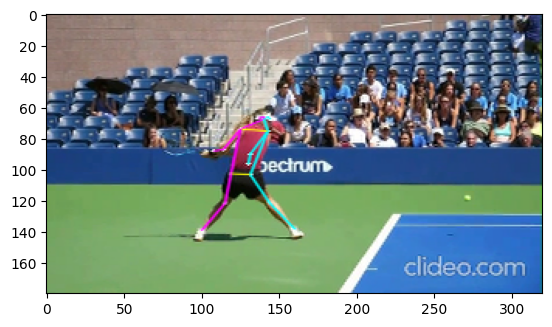

In [ ]:
plt.imshow(skeleton8_train_frames[190][4])

In [ ]:
skeleton8_train_classes[148]

4

In [ ]:
skeleton8_val_classes[:]

array([1, 0, 4, 4, 2, 2, 2, 3, 4, 3, 5, 0, 3, 2, 6, 2, 3, 6, 0, 5, 6, 4,
       2, 3, 5, 5, 5, 0, 4, 2, 3, 1, 1, 6, 1, 5, 0, 3, 0, 4, 2, 6, 5, 6,
       4, 2, 6, 1, 0, 5, 5, 3, 3, 4, 0, 3, 6, 6, 2, 3, 1, 0, 2, 6, 4, 4,
       0, 1, 5, 0, 1, 6, 5, 1, 1, 6, 3, 2, 2, 5, 5, 0, 1, 4, 1, 4, 3, 6,
       4, 1, 0], dtype=int32)

In [ ]:
from keras.utils import to_categorical

# Перетворення міток класів в one-hot encoding
skeleton8_train_classes = to_categorical(skeleton8_train_classes)
skeleton8_test_classes = to_categorical(skeleton8_test_classes)
skeleton8_val_classes = to_categorical(skeleton8_val_classes)

In [ ]:
skeleton8_train_classes[148]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
skeleton8_cnn3d.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = skeleton8_cnn3d.fit(skeleton8_train_frames, skeleton8_train_classes, epochs=200, batch_size=16, validation_data=(skeleton8_val_frames, skeleton8_val_classes))

Epoch 1/200
14/14 [==============================] - 25s 873ms/step - loss: 1286.2916 - accuracy: 0.2476 - val_loss: 16286.0537 - val_accuracy: 0.1758
Epoch 2/200
14/14 [==============================] - 7s 504ms/step - loss: 1799.8008 - accuracy: 0.3810 - val_loss: 7706.2217 - val_accuracy: 0.1429
Epoch 3/200
14/14 [==============================] - 7s 508ms/step - loss: 1628.2889 - accuracy: 0.5524 - val_loss: 6163.4243 - val_accuracy: 0.1319
Epoch 4/200
14/14 [==============================] - 7s 500ms/step - loss: 1382.9945 - accuracy: 0.6476 - val_loss: 4289.0400 - val_accuracy: 0.2418
Epoch 5/200
14/14 [==============================] - 7s 508ms/step - loss: 1167.3591 - accuracy: 0.7095 - val_loss: 3385.4509 - val_accuracy: 0.1538
Epoch 6/200
14/14 [==============================] - 7s 474ms/step - loss: 1003.7177 - accuracy: 0.7000 - val_loss: 3025.9121 - val_accuracy: 0.1648
Epoch 7/200
14/14 [==============================] - 7s 506ms/step - loss: 832.7006 - accuracy: 0.7524 -

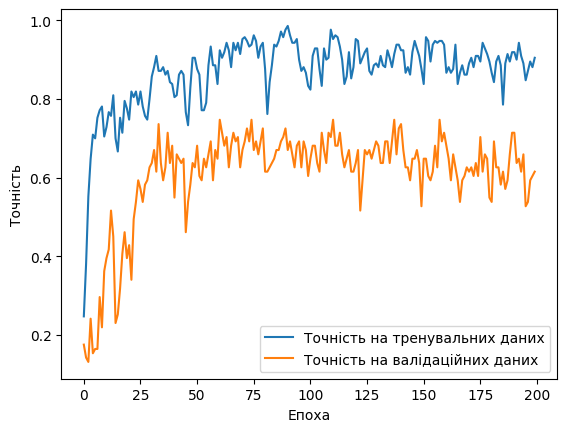

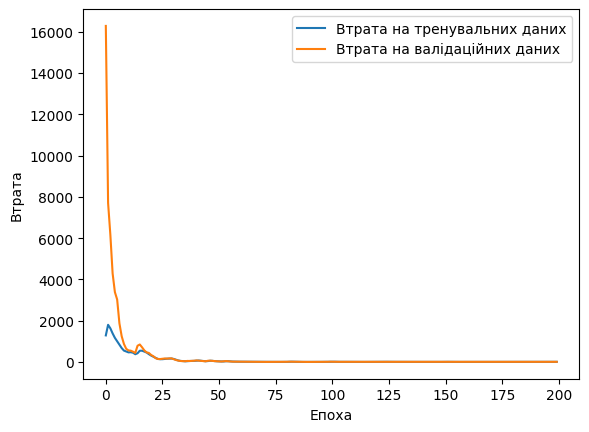

In [ ]:
import matplotlib.pyplot as plt

# Відображення графіка точності
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Відображення графіка втрати
plt.plot(history.history['loss'], label='Втрата на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрата на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Зробити передбачення на тренувальних і тестових даних
skeleton8_train_predictions = np.argmax(skeleton8_cnn3d.predict(skeleton8_train_frames, batch_size=16), axis=1)
skeleton8_test_predictions = np.argmax(skeleton8_cnn3d.predict(skeleton8_test_frames, batch_size=16), axis=1)
skeleton8_val_predictions = np.argmax(skeleton8_cnn3d.predict(skeleton8_val_frames, batch_size=16), axis=1)

# Отримати істинні мітки класів
skeleton8_train_true_labels = np.argmax(skeleton8_train_classes, axis=1)
skeleton8_test_true_labels = np.argmax(skeleton8_test_classes, axis=1)
skeleton8_val_true_labels = np.argmax(skeleton8_val_classes, axis=1)

# Побудувати матрицю плутанини для тренувальних і тестових даних
skeleton8_train_confusion_matrix = confusion_matrix(skeleton8_train_true_labels, skeleton8_train_predictions)
skeleton8_test_confusion_matrix = confusion_matrix(skeleton8_test_true_labels, skeleton8_test_predictions)
skeleton8_val_confusion_matrix = confusion_matrix(skeleton8_val_true_labels, skeleton8_val_predictions)

6/6 [==============================] - 1s 157ms/step


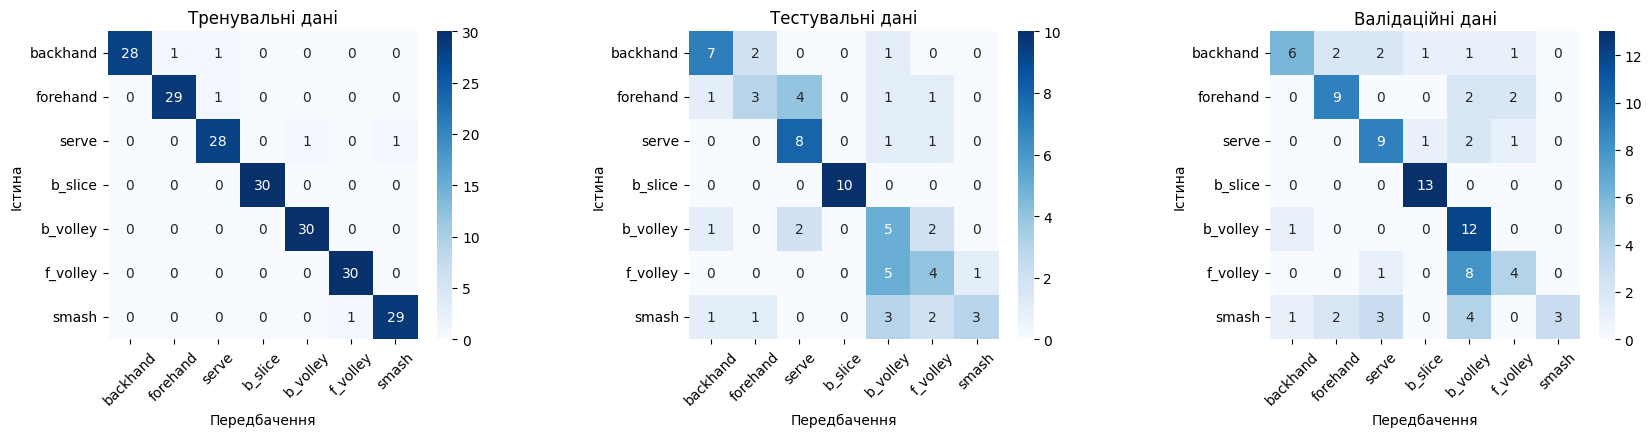

In [ ]:
class_labels = ['backhand', 'forehand', 'serve', 'b_slice', 'b_volley', 'f_volley', 'smash']

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
sns.heatmap(skeleton8_train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тренувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 2)
sns.heatmap(skeleton8_test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тестувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 3)
sns.heatmap(skeleton8_val_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Валідаційні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
from sklearn.metrics import precision_score

class_names = {'backhand': 0, 'forehand': 1, 'serve': 2, 'b_slice': 3, 'b_volley': 4, 'f_volley': 5, 'smash': 6}

# Обчислити точність для тренувальних, валідаційних і тестових даних для кожного класу
skeleton8_train_precision = precision_score(skeleton8_train_true_labels, skeleton8_train_predictions, average=None)
skeleton8_val_precision = precision_score(skeleton8_val_true_labels, skeleton8_val_predictions, average=None)
skeleton8_test_precision = precision_score(skeleton8_test_true_labels, skeleton8_test_predictions, average=None)

print("Точність рухів тренувальних даних:")
for class_name, precision in zip(class_names.keys(), skeleton8_train_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів валідаційних даних:")
for class_name, precision in zip(class_names.keys(), skeleton8_val_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів тестових даних:")
for class_name, precision in zip(class_names.keys(), skeleton8_test_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

Точність для тренувальних даних:
backhand: 1.0000
forehand: 0.9667
serve   : 0.9333
b_slice : 1.0000
b_volley: 0.9677
f_volley: 0.9677
smash   : 0.9667

Точність для валідаційних даних:
backhand: 0.7500
forehand: 0.6923
serve   : 0.6000
b_slice : 0.8667
b_volley: 0.4138
f_volley: 0.5000
smash   : 1.0000

Точність для тестових даних:
backhand: 0.7000
forehand: 0.5000
serve   : 0.5714
b_slice : 1.0000
b_volley: 0.3125
f_volley: 0.4000
smash   : 0.7500


In [ ]:
from sklearn.metrics import accuracy_score

# Обчислення точності для тренувальних та тестових даних
skeleton8_train_accuracy = accuracy_score(skeleton8_train_true_labels, skeleton8_train_predictions)
skeleton8_test_accuracy = accuracy_score(skeleton8_test_true_labels, skeleton8_test_predictions)
skeleton8_val_accuracy = accuracy_score(skeleton8_val_true_labels, skeleton8_val_predictions)

print("Train Accuracy:", skeleton8_train_accuracy)
print("Test Accuracy:", skeleton8_test_accuracy)
print("Val Accuracy:", skeleton8_val_accuracy)

Train Accuracy: 0.9714285714285714
Test Accuracy: 0.5714285714285714
Val Accuracy: 0.6153846153846154


In [ ]:
skeleton8_cnn3d.save('skeleton8_cnn3d.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
